# Policy Advices zur Energieerzeugung ohne Treibhausgasausstoss

## 1. Einleitung
### 1.1 Situation
.... von BOSCARD übernehemn?

### 1.2 Ziel
....

### 1.3 Daten
In diesem Projekt wollen wir die Entwicklung der Energieerzeugung ohne Treibhausgasausstoss sowie die Entwicklung des CO2 Ausstosses seit 1990 analysieren. Wir betrachtet hierbei 4 verschiedene Länder: Deutschland, Frankreich, Grossbritannien und die Schweiz.

Die Daten, welche für die Analysen benötigt werden, stammen von [ourworldindata.org](https://ourworldindata.org/) und sind frei zugänglich.

#### Bibliotheken importieren

In [1]:
# Import all the helper functions
from helper import *

## 2. Explorative Datenanalyse

### 2.1 CO2 Emissionen

#### 2.1.1 Daten Bereinigung

Hier lesen wir die CO2 Emissionen ein und bearbeiten die Daten wie folgt:

1. Behalte Einträge ab Jahr 1990 im DataFrame.
2. Entferne die Spalte "Code".
3. Ändere den Spaltennamen "Entity" in "Country".
4. Behalte nur Schweiz, Spanien, Deutschland und UK.
5. Teile Werte in der Spalte "Annual CO₂ emissions" in miliarde Tonnen um.

In [2]:
# Read co2 emission data
df_emissions = pd.read_csv("Data/All/CO2/annual-co2-emissions-per-country.csv")

# Wrangle data
df_emissions = wrangle_dataframe(df_emissions, "Annual CO₂ emissions")

# Rename Annual CO₂ emissions to CO2 emissions (billion t)
df_emissions.rename(columns = {'Annual CO₂ emissions': 'CO₂ emissions (billion t)'}, inplace = True)

df_emissions

,Country,Year,CO₂ emissions (billion t)
0,Germany,1990,1.051979
1,Germany,1991,1.013824
2,Germany,1992,0.965542
3,Germany,1993,0.955820
4,Germany,1994,0.939492
...,...,...,...
123,United Kingdom,2017,0.387367
124,United Kingdom,2018,0.379730
125,United Kingdom,2019,0.364753
126,United Kingdom,2020,0.326263


In [3]:
# rename Country to Land
df_emissions.rename(columns = {'Country': 'Land'}, inplace = True)

# rename Year to Jahr
df_emissions.rename(columns = {'Year': 'Jahr'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_emissions.rename(columns = {'CO₂ emissions (billion t)': 'CO₂-Emissionen (Mrd. t)'}, inplace = True)

# rename Germany to Deutschland
df_emissions.replace('Germany', 'Deutschland', inplace = True)

# rename United Kingdom to Grossbritannien
df_emissions.replace('United Kingdom', 'Grossbritannien', inplace = True)

# rename Switzerland to Schweiz
df_emissions.replace('Switzerland', 'Schweiz', inplace = True)

# rename Spain to Spanien
df_emissions.replace('Spain', 'Spanien', inplace = True)

df_emissions

,Land,Jahr,CO₂-Emissionen (Mrd. t)
0,Deutschland,1990,1.051979
1,Deutschland,1991,1.013824
2,Deutschland,1992,0.965542
3,Deutschland,1993,0.955820
4,Deutschland,1994,0.939492
...,...,...,...
123,Grossbritannien,2017,0.387367
124,Grossbritannien,2018,0.379730
125,Grossbritannien,2019,0.364753
126,Grossbritannien,2020,0.326263


### 2.1.2 CO2 Emissionen pro Kopf

Es ist aber nicht sinnvoll, die absoluten CO2 Emissionen zu betrachten, da die Länder unterschiedlich gross in Landesfläche und Population sind. Deshalb betrachten wir die CO2-Emissionen pro Kopf und Jahr sowie pro Quadratmeter und Jahr. Dies ermöglicht einen Vergleich der Emissionen, der unabhängig von der Grösse des Landes und der Bevölkerung ist.

Um die CO2-Emissionen pro Kopf und Jahr zu berechnen, teilen wir die Gesamtemissionen eines Landes in einem bestimmten Jahr durch die Bevölkerungszahl dieses Landes in diesem Jahr.

#### 2.1.2.1 Datenaufbereitung

In [4]:
# Read population data
df_population = pd.read_csv("Data/All/population.csv")

# Rename population column
df_population.rename(columns = {'Population (historical estimates)': 'Population'}, inplace = True)

# Wrangle data
df_population = wrangle_dataframe(df_population, "Population")

df_population

,Country,Year,Population
0,Germany,1990,79370192
1,Germany,1991,79801984
2,Germany,1992,80205024
3,Germany,1993,80573496
4,Germany,1994,80882120
...,...,...,...
123,United Kingdom,2017,66064808
124,United Kingdom,2018,66432996
125,United Kingdom,2019,66778660
126,United Kingdom,2020,67059472


In [5]:
# rename Country to Land
df_population.rename(columns = {'Country': 'Land'}, inplace = True)

# rename Year to Jahr
df_population.rename(columns = {'Year': 'Jahr'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_population.rename(columns = {'Population': 'Bevölkerung'}, inplace = True)

# rename Germany to Deutschland
df_population.replace('Germany', 'Deutschland', inplace = True)

# rename United Kingdom to Grossbritannien
df_population.replace('United Kingdom', 'Grossbritannien', inplace = True)

# rename Switzerland to Schweiz
df_population.replace('Switzerland', 'Schweiz', inplace = True)

# rename Spain to Spanien
df_population.replace('Spain', 'Spanien', inplace = True)

df_population

,Land,Jahr,Bevölkerung
0,Deutschland,1990,79370192
1,Deutschland,1991,79801984
2,Deutschland,1992,80205024
3,Deutschland,1993,80573496
4,Deutschland,1994,80882120
...,...,...,...
123,Grossbritannien,2017,66064808
124,Grossbritannien,2018,66432996
125,Grossbritannien,2019,66778660
126,Grossbritannien,2020,67059472


Wir können nun die beiden Datensätzen verbinden und die Emissionen pro Kopf und Jahr berechnen.

In [6]:
# Merge dataframes
df_emissions_population = pd.merge(df_emissions, df_population, on = ['Land', 'Jahr'])

# Create copy of dataframe for emissions per capita
df_em_pop_cap = df_emissions_population.copy()

# Calculate emissions per capita
df_em_pop_cap['CO₂-Emissionen pro Kopf (t)'] = round(df_em_pop_cap['CO₂-Emissionen (Mrd. t)'] / df_em_pop_cap['Bevölkerung'] * 1000000000, 2)

df_em_pop_cap

,Land,Jahr,CO₂-Emissionen (Mrd. t),Bevölkerung,CO₂-Emissionen pro Kopf (t)
0,Deutschland,1990,1.051979,79370192,13.25
1,Deutschland,1991,1.013824,79801984,12.70
2,Deutschland,1992,0.965542,80205024,12.04
3,Deutschland,1993,0.955820,80573496,11.86
4,Deutschland,1994,0.939492,80882120,11.62
...,...,...,...,...,...
123,Grossbritannien,2017,0.387367,66064808,5.86
124,Grossbritannien,2018,0.379730,66432996,5.72
125,Grossbritannien,2019,0.364753,66778660,5.46
126,Grossbritannien,2020,0.326263,67059472,4.87


Jetzt haben wir die CO₂ Emissionen pro Kopf pro Land und Jahr. Wir können nun die Entwicklung der Emissionen pro Kopf pro Land über die Zeit betrachten (absolute und relative Werte).

In [7]:
# Create new column and group by country to get value from first row (1990) - add that value to each row
df_em_pop_cap['CO₂-Emissionen 1990'] = df_em_pop_cap.groupby('Land')['CO₂-Emissionen (Mrd. t)'].transform('first')

# Calculate relative change since 1990
df_em_pop_cap['Relative Veränderung CO₂ seit 1990'] = round((df_em_pop_cap['CO₂-Emissionen (Mrd. t)'] - df_em_pop_cap['CO₂-Emissionen 1990']) / df_em_pop_cap['CO₂-Emissionen 1990'] * 100, 2)

df_em_pop_cap

,Land,Jahr,CO₂-Emissionen (Mrd. t),Bevölkerung,CO₂-Emissionen pro Kopf (t),CO₂-Emissionen 1990,Relative Veränderung CO₂ seit 1990
0,Deutschland,1990,1.051979,79370192,13.25,1.051979,0.00
1,Deutschland,1991,1.013824,79801984,12.70,1.051979,-3.63
2,Deutschland,1992,0.965542,80205024,12.04,1.051979,-8.22
3,Deutschland,1993,0.955820,80573496,11.86,1.051979,-9.14
4,Deutschland,1994,0.939492,80882120,11.62,1.051979,-10.69
...,...,...,...,...,...,...,...
123,Grossbritannien,2017,0.387367,66064808,5.86,0.601945,-35.65
124,Grossbritannien,2018,0.379730,66432996,5.72,0.601945,-36.92
125,Grossbritannien,2019,0.364753,66778660,5.46,0.601945,-39.40
126,Grossbritannien,2020,0.326263,67059472,4.87,0.601945,-45.80


In [8]:
# Create new column and group by country to get value from first row (1990) - add that value to each row
df_em_pop_cap['CO₂-Emissionen pro Kopf 1990'] = df_em_pop_cap.groupby('Land')['CO₂-Emissionen pro Kopf (t)'].transform(lambda x: x.iloc[0])

# Calculate relative change since 1990
df_em_pop_cap['Relative Veränderung CO₂ pro Kopf seit 1990'] = round((df_em_pop_cap['CO₂-Emissionen pro Kopf (t)'] - df_em_pop_cap['CO₂-Emissionen pro Kopf 1990']) / df_em_pop_cap['CO₂-Emissionen pro Kopf 1990'] * 100, 2)

df_em_pop_cap

,Land,Jahr,CO₂-Emissionen (Mrd. t),Bevölkerung,CO₂-Emissionen pro Kopf (t),CO₂-Emissionen 1990,Relative Veränderung CO₂ seit 1990,CO₂-Emissionen pro Kopf 1990,Relative Veränderung CO₂ pro Kopf seit 1990
0,Deutschland,1990,1.051979,79370192,13.25,1.051979,0.00,13.25,0.00
1,Deutschland,1991,1.013824,79801984,12.70,1.051979,-3.63,13.25,-4.15
2,Deutschland,1992,0.965542,80205024,12.04,1.051979,-8.22,13.25,-9.13
3,Deutschland,1993,0.955820,80573496,11.86,1.051979,-9.14,13.25,-10.49
4,Deutschland,1994,0.939492,80882120,11.62,1.051979,-10.69,13.25,-12.30
...,...,...,...,...,...,...,...,...,...
123,Grossbritannien,2017,0.387367,66064808,5.86,0.601945,-35.65,10.52,-44.30
124,Grossbritannien,2018,0.379730,66432996,5.72,0.601945,-36.92,10.52,-45.63
125,Grossbritannien,2019,0.364753,66778660,5.46,0.601945,-39.40,10.52,-48.10
126,Grossbritannien,2020,0.326263,67059472,4.87,0.601945,-45.80,10.52,-53.71


#### 2.1.2.2 Visualisierungen

In [9]:
# Plot CO₂ emissions per capita (t)
lineplot(df_em_pop_cap, "Jahr", "CO₂-Emissionen pro Kopf (t)", "Land", "CO₂-Emissionen pro Kopf (t)")

:NdOverlay   [Land]
   :Curve   [Jahr]   (CO₂-Emissionen pro Kopf (t))

Im Plot oben sieht man die Entwicklung der CO2-Emissionen pro Kopf, Jahr und Land seit 1990.

In [10]:
# Plot Relative change CO₂ per capita since 1990
lineplot(df_em_pop_cap, "Jahr", "Relative Veränderung CO₂ pro Kopf seit 1990", "Land", "Relative Veränderung CO₂ pro Kopf seit 1990")

:NdOverlay   [Land]
   :Curve   [Jahr]   (Relative Veränderung CO₂ pro Kopf seit 1990)

Hier sehen wir die relative Veränderung der CO2-Emissionen pro Kopf und Jahr seit 1990.

In [11]:
# Plot Relative change CO₂ since 1990
lineplot(df_em_pop_cap, "Jahr", "Relative Veränderung CO₂ seit 1990", "Land", "Relative Veränderung CO₂ pro Kopf seit 1990")

:NdOverlay   [Land]
   :Curve   [Jahr]   (Relative Veränderung CO₂ seit 1990)

Hier sehen wir die relative Veränderung der CO2-Emissionen und Jahr seit 1990. Dieser Plot und der Plot oben sehen sehr ähnlich aus.

#### 2.1.2.3 Fragen die man sich stellen kann anhand der Plots:
1. Warum hatte Spanien von etwa 1995 bis 2008 einen so grossen Anstieg der CO2-Emissionen pro Kopf?

...

2. Verbunden mit der ersten Frage: Was ist passiert, dass dann die Emissionen pro Kopf wieder gesunken sind?

...


### 2.1.3 CO2 Emissionen pro Quadratmeter

Hier die Landesflächen der Länder:

| Land | Fläche in km2 |
| --- | --- |
| Deutschland | 357.386 |
| Spanien | 505.990 |
| Schweiz | 41.285 |
| UK | 242.495 |

[Quelle](https://de.wikipedia.org/wiki/Liste_von_Staaten_und_Territorien_nach_Fl%C3%A4che)

Um die CO2-Emissionen pro Quadratmeter und Jahr zu berechnen, teilen wir die Gesamtemissionen eines Landes in einem bestimmten Jahr durch die Fläche dieses Landes.

#### 2.1.3.1 Datenaufbereitung

In [12]:
land_areas = [357386, 505990, 41285, 242495]

# Get list of countries
countries = df_em_pop_cap['Land'].unique().tolist()

# Match countries with land areas
country_land_area = dict(zip(countries, land_areas))

# Create new dataframe for emissions per land area
df_em_pop_cap_land = df_em_pop_cap.copy()

df_em_pop_cap_land['Landfläche'] = df_em_pop_cap_land['Land'].map(country_land_area)
df_em_pop_cap_land['CO₂-Emissionen pro Landfläche (t/km²)'] = round(df_em_pop_cap_land['CO₂-Emissionen (Mrd. t)'] * 1e9 / df_em_pop_cap_land['Landfläche'], 2)

# Remove column Land Area
df_em_pop_cap_land.drop(columns = ['Landfläche'], inplace = True)

df_em_pop_cap_land

,Land,Jahr,CO₂-Emissionen (Mrd. t),Bevölkerung,CO₂-Emissionen pro Kopf (t),CO₂-Emissionen 1990,Relative Veränderung CO₂ seit 1990,CO₂-Emissionen pro Kopf 1990,Relative Veränderung CO₂ pro Kopf seit 1990,CO₂-Emissionen pro Landfläche (t/km²)
0,Deutschland,1990,1.051979,79370192,13.25,1.051979,0.00,13.25,0.00,2943.54
1,Deutschland,1991,1.013824,79801984,12.70,1.051979,-3.63,13.25,-4.15,2836.78
2,Deutschland,1992,0.965542,80205024,12.04,1.051979,-8.22,13.25,-9.13,2701.68
3,Deutschland,1993,0.955820,80573496,11.86,1.051979,-9.14,13.25,-10.49,2674.48
4,Deutschland,1994,0.939492,80882120,11.62,1.051979,-10.69,13.25,-12.30,2628.79
...,...,...,...,...,...,...,...,...,...,...
123,Grossbritannien,2017,0.387367,66064808,5.86,0.601945,-35.65,10.52,-44.30,1597.42
124,Grossbritannien,2018,0.379730,66432996,5.72,0.601945,-36.92,10.52,-45.63,1565.93
125,Grossbritannien,2019,0.364753,66778660,5.46,0.601945,-39.40,10.52,-48.10,1504.17
126,Grossbritannien,2020,0.326263,67059472,4.87,0.601945,-45.80,10.52,-53.71,1345.44


In [13]:
# Create new column and group by country to get value from first row (1990) - add that value to each row
df_em_pop_cap_land['CO₂-Emissionen 1990'] = df_em_pop_cap_land.groupby('Land')['CO₂-Emissionen (Mrd. t)'].transform(lambda x: x.iloc[0])

# Calculate relative change since 1990
df_em_pop_cap_land['Relative Veränderung CO₂ seit 1990'] = round((df_em_pop_cap_land['CO₂-Emissionen (Mrd. t)'] - df_em_pop_cap_land['CO₂-Emissionen 1990']) / df_em_pop_cap_land['CO₂-Emissionen 1990'] * 100, 2)

# Remove column CO₂ emissions 1990
df_em_pop_cap_land.drop(columns = ['CO₂-Emissionen 1990'], inplace = True)

df_em_pop_cap

,Land,Jahr,CO₂-Emissionen (Mrd. t),Bevölkerung,CO₂-Emissionen pro Kopf (t),CO₂-Emissionen 1990,Relative Veränderung CO₂ seit 1990,CO₂-Emissionen pro Kopf 1990,Relative Veränderung CO₂ pro Kopf seit 1990
0,Deutschland,1990,1.051979,79370192,13.25,1.051979,0.00,13.25,0.00
1,Deutschland,1991,1.013824,79801984,12.70,1.051979,-3.63,13.25,-4.15
2,Deutschland,1992,0.965542,80205024,12.04,1.051979,-8.22,13.25,-9.13
3,Deutschland,1993,0.955820,80573496,11.86,1.051979,-9.14,13.25,-10.49
4,Deutschland,1994,0.939492,80882120,11.62,1.051979,-10.69,13.25,-12.30
...,...,...,...,...,...,...,...,...,...
123,Grossbritannien,2017,0.387367,66064808,5.86,0.601945,-35.65,10.52,-44.30
124,Grossbritannien,2018,0.379730,66432996,5.72,0.601945,-36.92,10.52,-45.63
125,Grossbritannien,2019,0.364753,66778660,5.46,0.601945,-39.40,10.52,-48.10
126,Grossbritannien,2020,0.326263,67059472,4.87,0.601945,-45.80,10.52,-53.71


#### 2.1.3.2 Visualisierungen

In [14]:
# plot co2 emissions per land area
lineplot(df_em_pop_cap_land, "Jahr", "CO₂-Emissionen pro Landfläche (t/km²)", "Land", "CO₂-Emissionen pro Landfläche (t/km²)")

:NdOverlay   [Land]
   :Curve   [Jahr]   (CO₂-Emissionen pro Landfläche (t/km²))

Hier sieht man die CO2 Emissionen pro Quadratmeter seit 1990. Es ist interessant zu sehen, dass Spanien die grösste Fläche hat, aber die geringsten Emissionen pro Quadratmeter.

## 2.2 Erneuerbare Energien
### 2.2.1 Datenaufbereitung

Diese Daten wurden auf die gleiche Weise wie die CO2-Emissionsdaten aufbereitet. "add_change_columns" berechnet den jährlichen absoluten und relativen Anstieg oder Abstieg der Energieerzeugung aus erneuerbaren Quellen.

#### 2.2.1.1 Solar

In [15]:
# Read solar energy production data
df_solar = pd.read_csv('Data/All/Solar/solar-energy-generation.csv')

# Wrangle data
df_solar = wrangle_dataframe(df_solar, "Electricity from solar (TWh)")

# Add yearly change columns (absolute and relative)
df_solar = add_change_columns(df_solar, 'Solar (TWh growth - equivalent)', 'Solar (% growth)', 'Electricity from solar (TWh)')

df_solar.head()

,Country,Year,Electricity from solar (TWh),Solar (TWh growth - equivalent),Solar (% growth)
0,Germany,1990,0.00,0.00,0.0
1,Germany,1991,0.00,0.00,0.0
2,Germany,1992,0.00,0.00,0.0
3,Germany,1993,0.00,0.00,0.0
4,Germany,1994,0.01,0.01,0.0


In [16]:
# rename Country to Land
df_solar.rename(columns = {'Country': 'Land'}, inplace = True)

# rename Year to Jahr
df_solar.rename(columns = {'Year': 'Jahr'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_solar.rename(columns = {'Electricity from solar (TWh)': 'Elektrizität aus Sonnenenergie (TWh)'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_solar.rename(columns = {'Solar (TWh growth - equivalent)': 'Solar (TWh Wachstum - Äquivalent)'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_solar.rename(columns = {'Solar (% growth)': 'Solar (Wachstum in %)'}, inplace = True)

# rename Germany to Deutschland
df_solar.replace('Germany', 'Deutschland', inplace = True)

# rename United Kingdom to Grossbritannien
df_solar.replace('United Kingdom', 'Grossbritannien', inplace = True)

# rename Switzerland to Schweiz
df_solar.replace('Switzerland', 'Schweiz', inplace = True)

# rename Spain to Spanien
df_solar.replace('Spain', 'Spanien', inplace = True)

df_solar

,Land,Jahr,Elektrizität aus Sonnenenergie (TWh),Solar (TWh Wachstum - Äquivalent),Solar (Wachstum in %)
0,Deutschland,1990,0.00,0.00,0.0
1,Deutschland,1991,0.00,0.00,0.0
2,Deutschland,1992,0.00,0.00,0.0
3,Deutschland,1993,0.00,0.00,0.0
4,Deutschland,1994,0.01,0.01,0.0
...,...,...,...,...,...
125,Grossbritannien,2017,11.46,1.06,10.2
126,Grossbritannien,2018,12.74,1.28,11.2
127,Grossbritannien,2019,12.92,0.18,1.4
128,Grossbritannien,2020,13.32,0.40,3.1


#### 2.2.1.2 Hydro

In [17]:
# Read hydro energy production data
df_hydro = pd.read_csv('Data/All/Hydropower/hydropower-generation.csv')

# Wrangle data
df_hydro = wrangle_dataframe(df_hydro, "Electricity from hydro (TWh)")

# Add yearly change columns (absolute and relative)
df_hydro = add_change_columns(df_hydro, 'Hydro (TWh growth - equivalent)', 'Hydro (% growth)', 'Electricity from hydro (TWh)')

df_hydro.head()

,Country,Year,Electricity from hydro (TWh),Hydro (TWh growth - equivalent),Hydro (% growth)
0,Germany,1990,17.43,0.00,0.0
1,Germany,1991,14.89,-2.54,-14.6
2,Germany,1992,17.40,2.51,16.9
3,Germany,1993,17.88,0.48,2.8
4,Germany,1994,19.93,2.05,11.5


In [18]:
# rename Country to Land
df_hydro.rename(columns = {'Country': 'Land'}, inplace = True)

# rename Year to Jahr
df_hydro.rename(columns = {'Year': 'Jahr'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_hydro.rename(columns = {'Electricity from hydro (TWh)': 'Elektrizität aus Wasserkraft (TWh)'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_hydro.rename(columns = {'Hydro (TWh growth - equivalent)': 'Wasserkraft (TWh Wachstum - Äquivalent)'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_hydro.rename(columns = {'Hydro (% growth)': 'Wasserkraft (% Wachstum)'}, inplace = True)

# rename Germany to Deutschland
df_hydro.replace('Germany', 'Deutschland', inplace = True)

# rename United Kingdom to Grossbritannien
df_hydro.replace('United Kingdom', 'Grossbritannien', inplace = True)

# rename Switzerland to Schweiz
df_hydro.replace('Switzerland', 'Schweiz', inplace = True)

# rename Spain to Spanien
df_hydro.replace('Spain', 'Spanien', inplace = True)

df_hydro

,Land,Jahr,Elektrizität aus Wasserkraft (TWh),Wasserkraft (TWh Wachstum - Äquivalent),Wasserkraft (% Wachstum)
0,Deutschland,1990,17.43,0.00,0.0
1,Deutschland,1991,14.89,-2.54,-14.6
2,Deutschland,1992,17.40,2.51,16.9
3,Deutschland,1993,17.88,0.48,2.8
4,Deutschland,1994,19.93,2.05,11.5
...,...,...,...,...,...
125,Grossbritannien,2017,5.88,0.51,9.5
126,Grossbritannien,2018,5.44,-0.44,-7.5
127,Grossbritannien,2019,5.93,0.49,9.0
128,Grossbritannien,2020,6.68,0.75,12.6


#### 2.2.1.3 Wind

In [19]:
# Read wind energy production data
df_wind = pd.read_csv('Data/All/Wind/wind-energy-generation.csv')

# Wrangle data
df_wind = wrangle_dataframe(df_wind, "Electricity from wind (TWh)")

# Add yearly change columns (absolute and relative)
df_wind = add_change_columns(df_wind, 'Wind (TWh growth - equivalent)', 'Wind (% growth)', 'Electricity from wind (TWh)')

df_wind.head()

,Country,Year,Electricity from wind (TWh),Wind (TWh growth - equivalent),Wind (% growth)
0,Germany,1990,0.07,0.00,0.0
1,Germany,1991,0.22,0.15,214.3
2,Germany,1992,0.29,0.07,31.8
3,Germany,1993,0.67,0.38,131.0
4,Germany,1994,1.43,0.76,113.4


In [20]:
# rename Country to Land
df_wind.rename(columns = {'Country': 'Land'}, inplace = True)

# rename Year to Jahr
df_wind.rename(columns = {'Year': 'Jahr'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_wind.rename(columns = {'Electricity from wind (TWh)': 'Elektrizität aus Windkraft (TWh)'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_wind.rename(columns = {'Wind (TWh growth - equivalent)': 'Wind (TWh Wachstum - Äquivalent)'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_wind.rename(columns = {'Wind (% growth)': 'Wind (% Wachstum)'}, inplace = True)

# rename Germany to Deutschland
df_wind.replace('Germany', 'Deutschland', inplace = True)

# rename United Kingdom to Grossbritannien
df_wind.replace('United Kingdom', 'Grossbritannien', inplace = True)

# rename Switzerland to Schweiz
df_wind.replace('Switzerland', 'Schweiz', inplace = True)

# rename Spain to Spanien
df_wind.replace('Spain', 'Spanien', inplace = True)

df_wind

,Land,Jahr,Elektrizität aus Windkraft (TWh),Wind (TWh Wachstum - Äquivalent),Wind (% Wachstum)
0,Deutschland,1990,0.07,0.00,0.0
1,Deutschland,1991,0.22,0.15,214.3
2,Deutschland,1992,0.29,0.07,31.8
3,Deutschland,1993,0.67,0.38,131.0
4,Deutschland,1994,1.43,0.76,113.4
...,...,...,...,...,...
125,Grossbritannien,2017,49.64,12.48,33.6
126,Grossbritannien,2018,56.91,7.27,14.6
127,Grossbritannien,2019,64.33,7.42,13.0
128,Grossbritannien,2020,73.64,9.31,14.5


#### 2.2.1.4 Other

In [21]:
# Read bioenergy production data
df_bioenergy = pd.read_csv('Data/All/Other/other-energy-generation.csv')

# Wrangle data
df_bioenergy = wrangle_dataframe(df_bioenergy, "Other renewables including bioenergy (TWh)")

# Add yearly change columns (absolute and relative)
df_bioenergy = add_change_columns(df_bioenergy, 'Other (TWh growth - equivalent)', 'Other (% growth)', 'Other renewables including bioenergy (TWh)')

df_bioenergy.head()

,Country,Year,Other renewables including bioenergy (TWh),Other (TWh growth - equivalent),Other (% growth)
0,Germany,1990,1.60,0.00,0.0
1,Germany,1991,1.87,0.27,16.9
2,Germany,1992,2.04,0.17,9.1
3,Germany,1993,1.97,-0.07,-3.4
4,Germany,1994,2.07,0.10,5.1


In [22]:
# rename Country to Land
df_bioenergy.rename(columns = {'Country': 'Land'}, inplace = True)

# rename Year to Jahr
df_bioenergy.rename(columns = {'Year': 'Jahr'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_bioenergy.rename(columns = {'Other renewables including bioenergy (TWh)': 'Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh)'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_bioenergy.rename(columns = {'Other (TWh growth - equivalent)': 'Sonstige (TWh Wachstum - Äquivalent)'}, inplace = True)

# rename CO2 emissions (billion t) to CO₂-Emissionen (Mrd. t)
df_bioenergy.rename(columns = {'Other (% growth)': 'Sonstige (Wachstum in %)'}, inplace = True)

# rename Germany to Deutschland
df_bioenergy.replace('Germany', 'Deutschland', inplace = True)

# rename United Kingdom to Grossbritannien
df_bioenergy.replace('United Kingdom', 'Grossbritannien', inplace = True)

# rename Switzerland to Schweiz
df_bioenergy.replace('Switzerland', 'Schweiz', inplace = True)

# rename Spain to Spanien
df_bioenergy.replace('Spain', 'Spanien', inplace = True)

df_bioenergy

,Land,Jahr,Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh),Sonstige (TWh Wachstum - Äquivalent),Sonstige (Wachstum in %)
0,Deutschland,1990,1.60,0.00,0.0
1,Deutschland,1991,1.87,0.27,16.9
2,Deutschland,1992,2.04,0.17,9.1
3,Deutschland,1993,1.97,-0.07,-3.4
4,Deutschland,1994,2.07,0.10,5.1
...,...,...,...,...,...
125,Grossbritannien,2017,31.87,1.81,6.0
126,Grossbritannien,2018,34.94,3.07,9.6
127,Grossbritannien,2019,37.30,2.36,6.8
128,Grossbritannien,2020,38.10,0.80,2.1


Jetzt können wir alle Dateframes verbinden und die Entwicklung der erneuerbaren Energien über die Zeit betrachten.

In [23]:
df_energy = pd.merge(df_solar, df_hydro, on=['Land', 'Jahr'])
df_energy = pd.merge(df_energy, df_wind, on=['Land', 'Jahr'])
df_energy = pd.merge(df_energy, df_bioenergy, on=['Land', 'Jahr'])

df_energy

,Land,Jahr,Elektrizität aus Sonnenenergie (TWh),Solar (TWh Wachstum - Äquivalent),Solar (Wachstum in %),Elektrizität aus Wasserkraft (TWh),Wasserkraft (TWh Wachstum - Äquivalent),Wasserkraft (% Wachstum),Elektrizität aus Windkraft (TWh),Wind (TWh Wachstum - Äquivalent),Wind (% Wachstum),Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh),Sonstige (TWh Wachstum - Äquivalent),Sonstige (Wachstum in %)
0,Deutschland,1990,0.00,0.00,0.0,17.43,0.00,0.0,0.07,0.00,0.0,1.60,0.00,0.0
1,Deutschland,1991,0.00,0.00,0.0,14.89,-2.54,-14.6,0.22,0.15,214.3,1.87,0.27,16.9
2,Deutschland,1992,0.00,0.00,0.0,17.40,2.51,16.9,0.29,0.07,31.8,2.04,0.17,9.1
3,Deutschland,1993,0.00,0.00,0.0,17.88,0.48,2.8,0.67,0.38,131.0,1.97,-0.07,-3.4
4,Deutschland,1994,0.01,0.01,0.0,19.93,2.05,11.5,1.43,0.76,113.4,2.07,0.10,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Grossbritannien,2017,11.46,1.06,10.2,5.88,0.51,9.5,49.64,12.48,33.6,31.87,1.81,6.0
126,Grossbritannien,2018,12.74,1.28,11.2,5.44,-0.44,-7.5,56.91,7.27,14.6,34.94,3.07,9.6
127,Grossbritannien,2019,12.92,0.18,1.4,5.93,0.49,9.0,64.33,7.42,13.0,37.30,2.36,6.8
128,Grossbritannien,2020,13.32,0.40,3.1,6.68,0.75,12.6,73.64,9.31,14.5,38.10,0.80,2.1


In [24]:
# export df_energy to csv
# df_energy.to_csv('Data/All/energy.csv', index = False)

### 2.2.2 Visualisierungen
#### 2.2.2.1 Solar

In [25]:
lineplot(df_solar, 'Jahr', 'Elektrizität aus Sonnenenergie (TWh)', 'Land', 'Solare Energieerzeugung')
lineplot(df_solar, 'Jahr', 'Solar (TWh Wachstum - Äquivalent)', 'Land', 'Jährliche Veränderung Solarenergieerzeugung')
lineplot(df_solar, 'Jahr', 'Solar (Wachstum in %)', 'Land', 'Jährliches Wachstum in % Solarenergieerzeugung')

:NdOverlay   [Land]
   :Curve   [Jahr]   (Elektrizität aus Sonnenenergie (TWh))

:NdOverlay   [Land]
   :Curve   [Jahr]   (Solar (TWh Wachstum - Äquivalent))

:NdOverlay   [Land]
   :Curve   [Jahr]   (Solar (Wachstum in %))

#### 2.2.2.2 Hydro

In [26]:
lineplot(df_hydro, 'Jahr', 'Elektrizität aus Wasserkraft (TWh)', 'Land', 'Energieerzeugung aus Wasserkraft')
lineplot(df_hydro, 'Jahr', 'Wasserkraft (TWh Wachstum - Äquivalent)', 'Land', 'Jährliche Veränderung Energieerzeugung aus Wasserkraft')
lineplot(df_hydro, 'Jahr', 'Wasserkraft (% Wachstum)', 'Land', 'Jährliches Wachstum in % Energieerzeugung aus Wasserkraft')

:NdOverlay   [Land]
   :Curve   [Jahr]   (Elektrizität aus Wasserkraft (TWh))

:NdOverlay   [Land]
   :Curve   [Jahr]   (Wasserkraft (TWh Wachstum - Äquivalent))

:NdOverlay   [Land]
   :Curve   [Jahr]   (Wasserkraft (% Wachstum))

#### 2.2.2.3 Wind

In [27]:
lineplot(df_wind, 'Jahr', 'Elektrizität aus Windkraft (TWh)', 'Land', 'Windenergieerzeugung')
lineplot(df_wind, 'Jahr', 'Wind (TWh Wachstum - Äquivalent)', 'Land', 'Jährliche Veränderung Windenergieerzeugung')
lineplot(df_wind, 'Jahr', 'Wind (% Wachstum)', 'Land', 'Jährliches Wachstum in % Windenergieerzeugung')

:NdOverlay   [Land]
   :Curve   [Jahr]   (Elektrizität aus Windkraft (TWh))

:NdOverlay   [Land]
   :Curve   [Jahr]   (Wind (TWh Wachstum - Äquivalent))

:NdOverlay   [Land]
   :Curve   [Jahr]   (Wind (% Wachstum))

#### 2.2.2.4 Other

In [28]:
lineplot(df_bioenergy, 'Jahr', 'Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh)', 'Land', 'Sonstige Energieerzeugung einschliesslich Bioenergie')
lineplot(df_bioenergy, 'Jahr', 'Sonstige (TWh Wachstum - Äquivalent)', 'Land', 'Jährliche Veränderung Sonstige Energieerzeugung')
lineplot(df_bioenergy, 'Jahr', 'Sonstige (Wachstum in %)', 'Land', 'Jährliches Wachstum in % Sonstige Energieerzeugung')

:NdOverlay   [Land]
   :Curve   [Jahr]   (Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh))

:NdOverlay   [Land]
   :Curve   [Jahr]   (Sonstige (TWh Wachstum - Äquivalent))

:NdOverlay   [Land]
   :Curve   [Jahr]   (Sonstige (Wachstum in %))

In [29]:
# Filter the data to only include Switzerland
df_switzerland = df_energy.loc[df_energy['Land'] == 'Schweiz', 
                               ['Jahr', 'Elektrizität aus Sonnenenergie (TWh)', 
                                'Elektrizität aus Wasserkraft (TWh)', 
                                'Elektrizität aus Windkraft (TWh)', 
                                'Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh)']]

# Filter the data to only include Germany
df_germany = df_energy.loc[df_energy['Land'] == 'Deutschland', 
                               ['Jahr', 'Elektrizität aus Sonnenenergie (TWh)', 
                                'Elektrizität aus Wasserkraft (TWh)', 
                                'Elektrizität aus Windkraft (TWh)', 
                                'Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh)']]

# Filter the data to only include United Kingdom
df_uk = df_energy.loc[df_energy['Land'] == 'Grossbritannien', 
                               ['Jahr', 'Elektrizität aus Sonnenenergie (TWh)', 
                                'Elektrizität aus Wasserkraft (TWh)', 
                                'Elektrizität aus Windkraft (TWh)', 
                                'Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh)']]

# Filter the data to only include Spain
df_spain = df_energy.loc[df_energy['Land'] == 'Spanien', 
                               ['Jahr', 'Elektrizität aus Sonnenenergie (TWh)', 
                                'Elektrizität aus Wasserkraft (TWh)', 
                                'Elektrizität aus Windkraft (TWh)', 
                                'Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh)']]

# Create a list of data frames
dfs = [df_switzerland, df_germany, df_uk, df_spain]

In [30]:
df_switzerland

,Jahr,Elektrizität aus Sonnenenergie (TWh),Elektrizität aus Wasserkraft (TWh),Elektrizität aus Windkraft (TWh),Sonstige erneuerbare Energien einschliesslich Bioenergie (TWh)
66,1990,0.001,29.797848,0.000,0.438
67,1991,0.002,32.080162,0.000,0.436
68,1992,0.003,32.703655,0.000,0.485
69,1993,0.004,35.781193,0.000,0.491
70,1994,0.005,39.072556,0.000,0.550
71,1995,0.006,35.171566,0.000,0.574
72,1996,0.007,28.747980,0.001,0.614
73,1997,0.007,34.046455,0.002,0.658
74,1998,0.008,33.475414,0.003,0.689
75,1999,0.010,40.008263,0.003,0.749


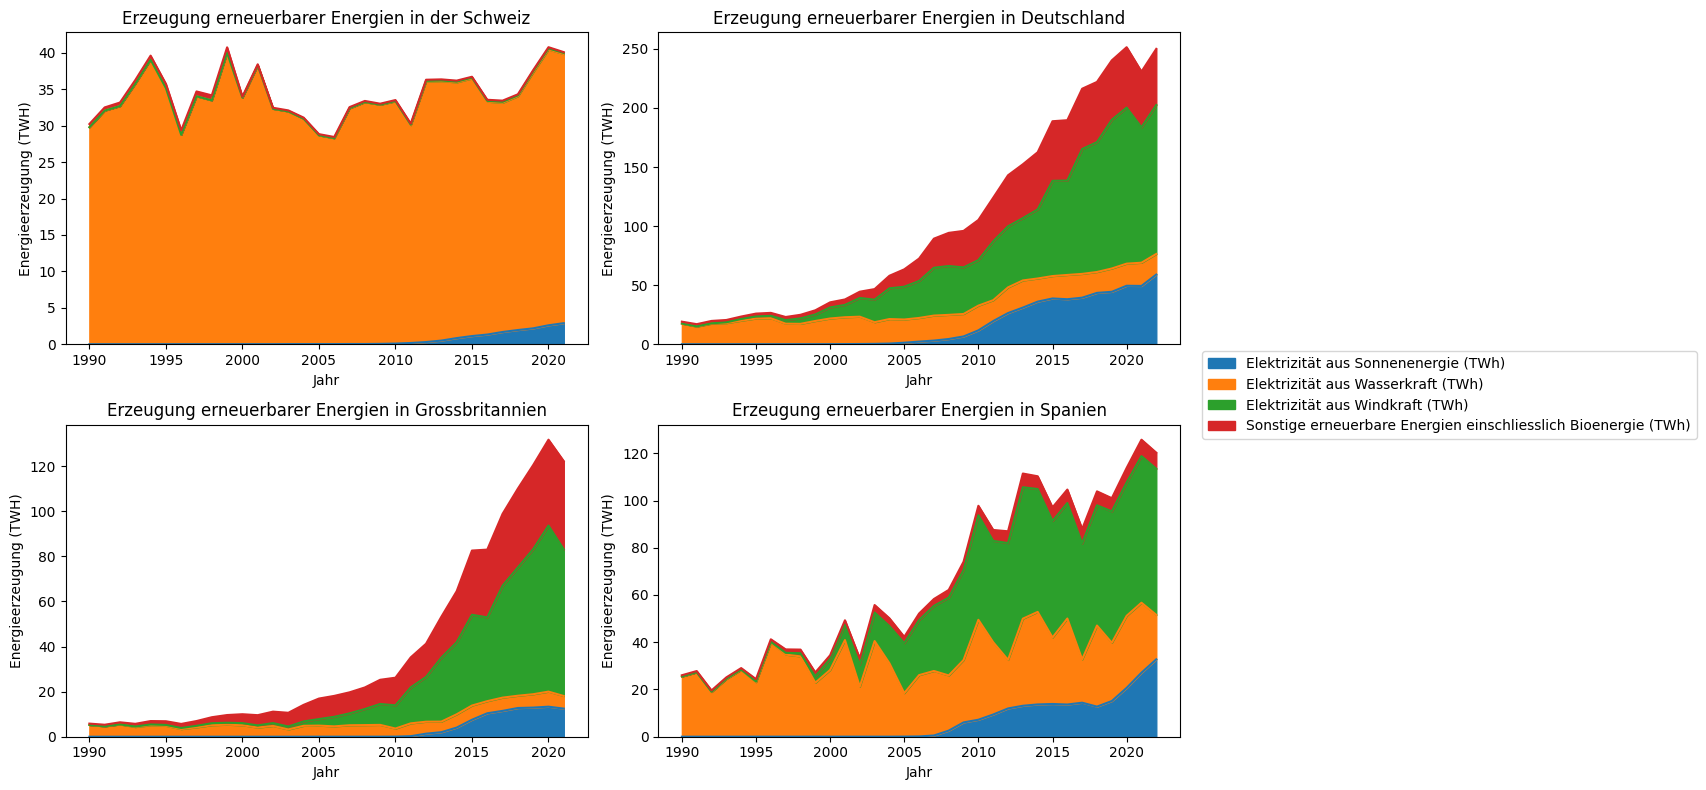

In [31]:
# Create a figure and axis objects with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Create a list of titles
titles = ['Erzeugung erneuerbarer Energien in der Schweiz', 
          'Erzeugung erneuerbarer Energien in Deutschland', 
          'Erzeugung erneuerbarer Energien in Grossbritannien', 
          'Erzeugung erneuerbarer Energien in Spanien']

# Loop through each data frame and create a stacked area chart on a subplot
for i, ax in enumerate(axs.flatten()):
    df = dfs[i]
    title = titles[i]
    
    df.set_index('Jahr').plot(kind='area', stacked=True, ax=ax)
    ax.set_xlabel('Jahr')
    ax.set_ylabel('Energieerzeugung (TWH)')
    ax.set_title(title)

    # Remove individual legends from each subplot
    ax.legend_.remove()

# Add a figure-level legend
# Add a common legend on the right side
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plot
plt.show()

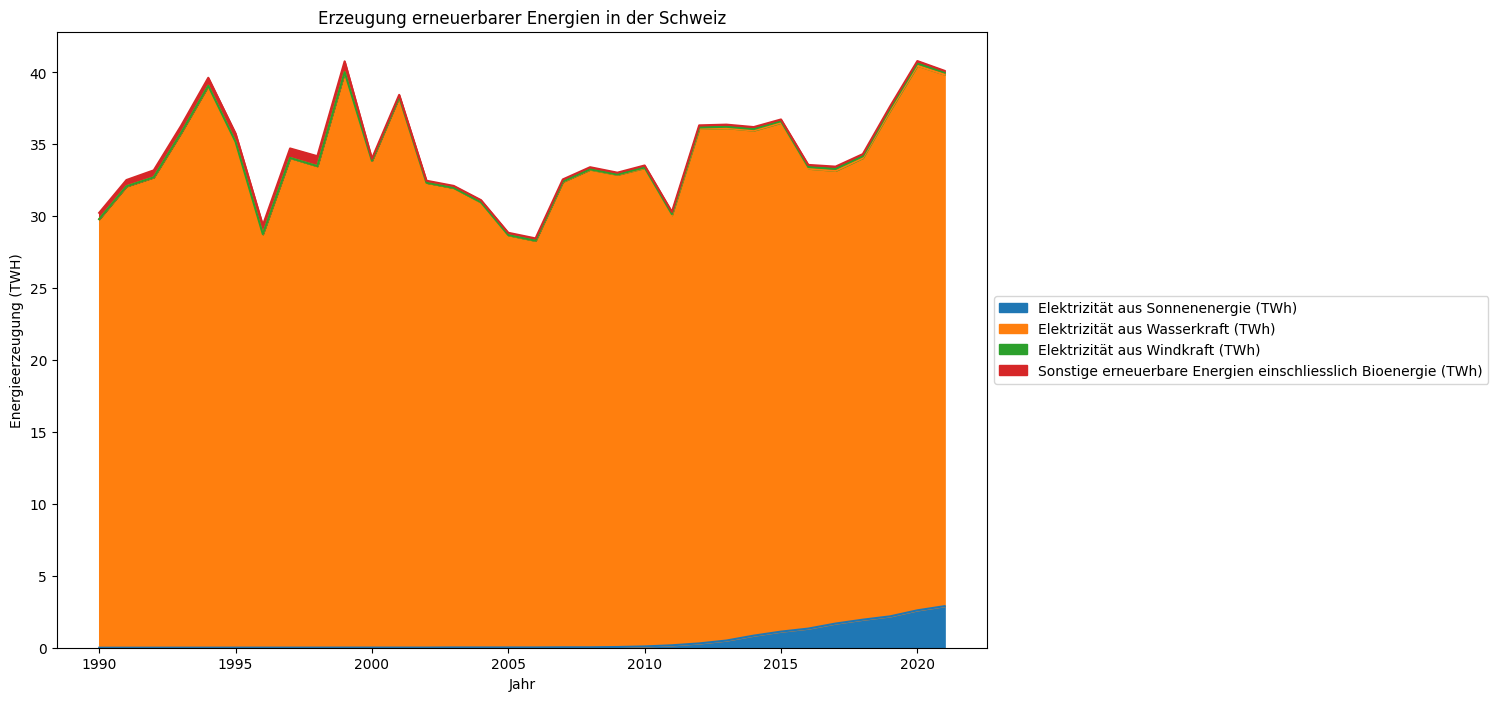

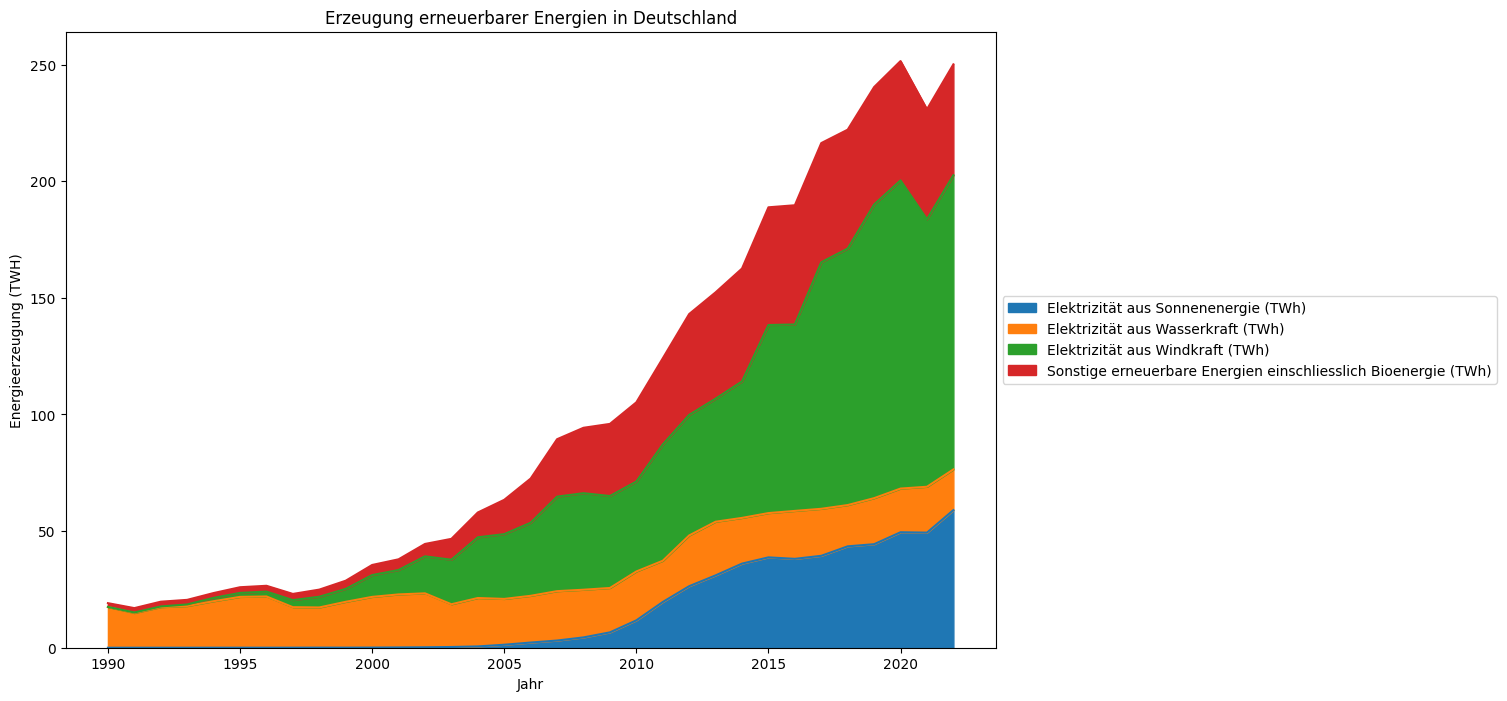

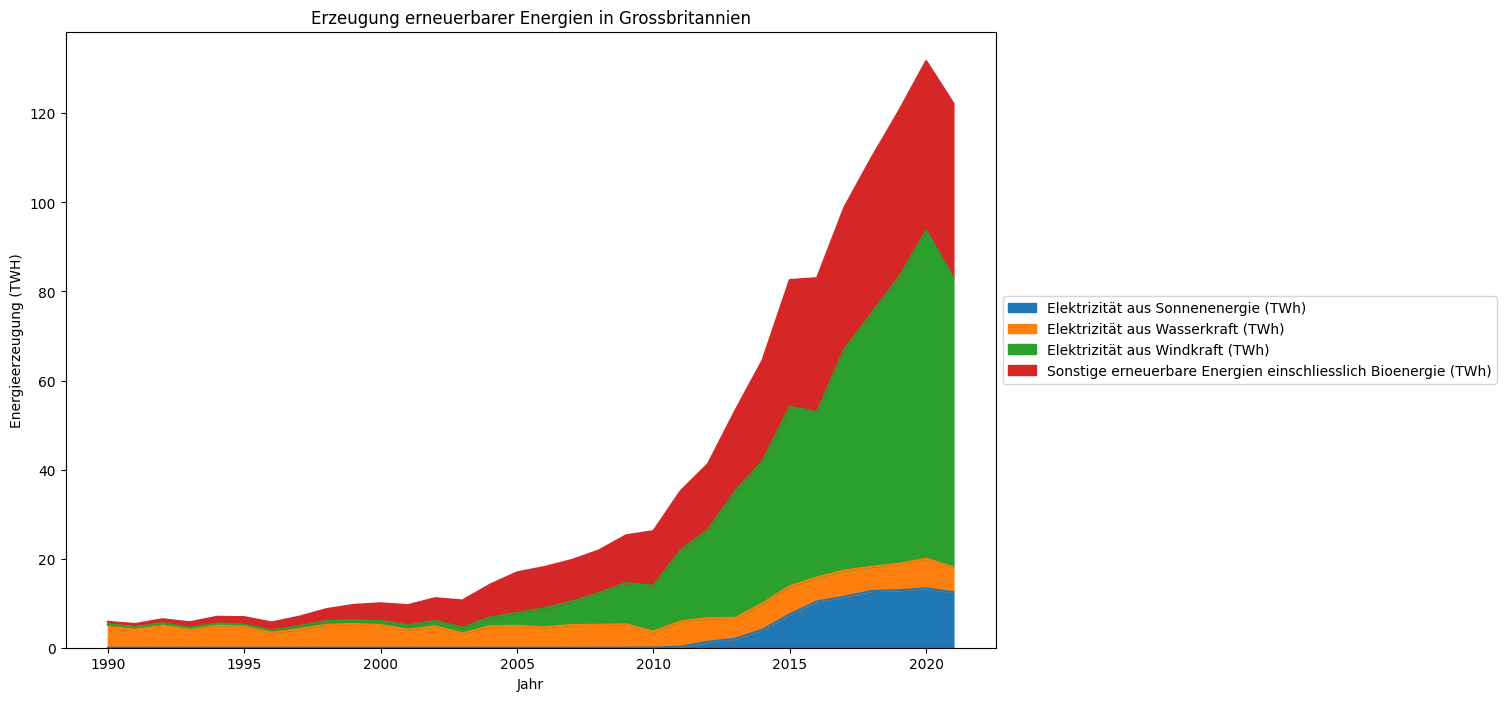

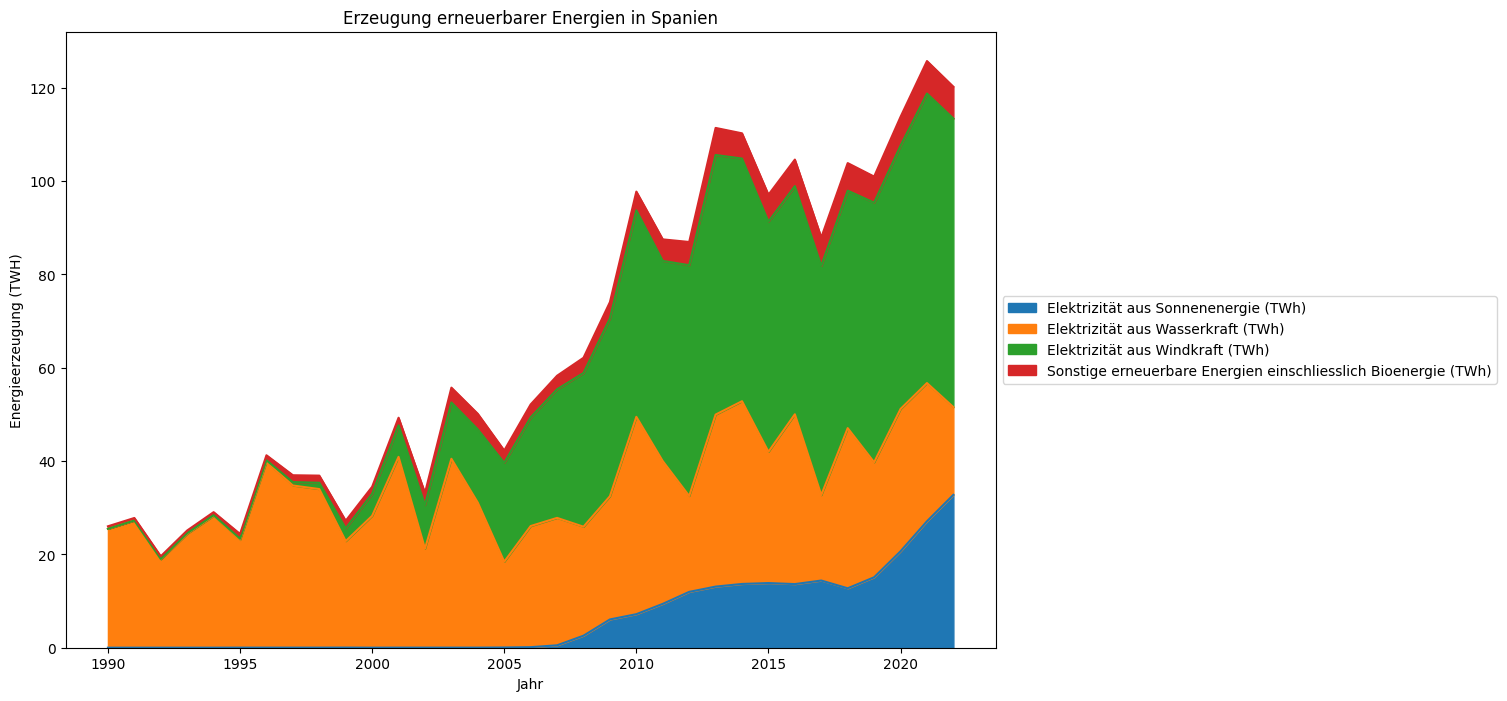

In [32]:
# stacked area chart for Switzerland
df_switzerland.set_index('Jahr').plot(kind='area', stacked=True, figsize=(12, 8))
plt.xlabel('Jahr')
plt.ylabel('Energieerzeugung (TWH)')
plt.title('Erzeugung erneuerbarer Energien in der Schweiz')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# stacked area chart for Germany
df_germany.set_index('Jahr').plot(kind='area', stacked=True, figsize=(12, 8))
plt.xlabel('Jahr')
plt.ylabel('Energieerzeugung (TWH)')
plt.title('Erzeugung erneuerbarer Energien in Deutschland')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# stacked area chart for United Kingdom
df_uk.set_index('Jahr').plot(kind='area', stacked=True, figsize=(12, 8))
plt.xlabel('Jahr')
plt.ylabel('Energieerzeugung (TWH)')
plt.title('Erzeugung erneuerbarer Energien in Grossbritannien')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# stacked area chart for Spain
df_spain.set_index('Jahr').plot(kind='area', stacked=True, figsize=(12, 8))
plt.xlabel('Jahr')
plt.ylabel('Energieerzeugung (TWH)')
plt.title('Erzeugung erneuerbarer Energien in Spanien')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [33]:
scatter_plot(df_germany, 'Elektrizität aus Sonnenenergie (TWh)', 'Elektrizität aus Wasserkraft (TWh)', 'Deutschland')

:Scatter   [Elektrizität aus Sonnenenergie (TWh)]   (Elektrizität aus Wasserkraft (TWh))

## Interpretationen
### Schweiz:
Es zeigt sich, dass die Produktion von erneuerbaren Energien im Laufe der Zeit zugenommen hat, wobei in den letzten Jahren ein deutliches Wachstum zu verzeichnen war. Die Wasserkraft leistet den grössten Beitrag zur Produktion erneuerbarer Energien in der Schweiz, gefolgt von Sonnen- und Windenergie. Die Produktion anderer erneuerbarer Energien, einschliesslich Bioenergie, ist im Vergleich zu den anderen Quellen relativ gering. Bis 2030 will die Schweiz ihre Emissionen halbieren, bis 2050 strebt der Bundesrat Netto-Null-Treibhausgas-Emissionen an.
- Quelle: https://www.bafu.admin.ch/bafu/de/home/themen/klima/inkuerze.html#:~:text=Bis%202030%20will%20die%20Schweiz,Null%2DTreibhausgas%2DEmissionen%20an

### Deutschland:
Im Grossen und Ganzen hat Deutschland bei allen Sektoren eine starke Wachstum angelegt in den letzten Jahren. Deutschland möchte bis 2030 die Emissionen um 65% reduzieren gegenüber 1990 und bis 2045 Klimaneutralität erreichen.
- Quelle: https://www.bundesregierung.de/breg-de/themen/klimaschutz/klimaschutzgesetz-2021-1913672#:~:text=Mit%20der%20%C3%84nderung%20des%20Klimaschutzgesetzes,65%20Prozent%20gegen%C3%BCber%201990%20sinken.

### Grossbritannien:
Die Daten zeigen einen stetigen Anstieg der erneuerbaren Energieerzeugung im Laufe der Jahre, wobei der Windenergie- und Solarenergieanteil in den letzten Jahren deutlich gestiegen ist. Großbritannien hat das Ziel, bis 2050 netto null Treibhausgasemissionen zu erreichen und hat den Ausstieg aus der Kohleenergie bis 2025 angekündigt.
- Quelle Net Zero 2025: https://www.gov.uk/government/publications/net-zero-strategy

### Spanien:
Die Daten zeigen, dass die Erzeugung erneuerbarer Energie in Spanien seit den frühen 2000er Jahren erheblich gestiegen ist, wobei insbesondere die Windenergieerzeugung einen signifikanten Anstieg verzeichnet hat. Spanien hat sich zum Ziel gesetzt, bis 2050 die Klimaneutralität zu erreichen.
- Quelle: https://www.gtai.de/de/trade/spanien/specials/spanien-im-breiten-konsens-gegen-den-klimawandel-813282

In [34]:
# plot co2 emissions vs renewable energy generation